The file sonar.mines contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles 
and under various conditions. The file sonar.rocks contains 97 patterns obtained from rocks under similar conditions. 
The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. 
The data set contains signals obtained from a variety of different aspect angles, s
panning 90 degrees for the cylinder and 180 degrees for the rock.

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.externals import joblib 

In [2]:
sf=pd.read_csv('sonar.csv', header=None)

In [3]:
sf.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
print(sf.shape)

(208, 61)


In [5]:
target_sf=sf.iloc[:,-1]
print(target_sf)

0      R
1      R
2      R
3      R
4      R
5      R
6      R
7      R
8      R
9      R
10     R
11     R
12     R
13     R
14     R
15     R
16     R
17     R
18     R
19     R
20     R
21     R
22     R
23     R
24     R
25     R
26     R
27     R
28     R
29     R
      ..
178    M
179    M
180    M
181    M
182    M
183    M
184    M
185    M
186    M
187    M
188    M
189    M
190    M
191    M
192    M
193    M
194    M
195    M
196    M
197    M
198    M
199    M
200    M
201    M
202    M
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object


In [6]:
feature_sf=sf.iloc[:,0:-1]
print(feature_sf)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6    0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9    0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10   0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11   0.0123  0.0309  0.0169  0.0313  0.0358  0.0102 

In [7]:
print(feature_sf.isnull().values.any().sum())

0


In [8]:
print(feature_sf.describe(include='all'))

               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118387    0.1

In [9]:
# Dependent variable classes R=Rock, M= Metal
sf.iloc[:,-1].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [10]:
print(feature_sf.skew())

0     2.131088
1     2.155644
2     2.652518
3     3.401697
4     2.018141
5     1.248166
6     0.970820
7     1.481107
8     1.633870
9     1.281258
10    0.987813
11    0.588681
12    0.736584
13    1.022369
14    0.763964
15    0.694671
16    0.654480
17    0.525845
18    0.283182
19   -0.085331
20   -0.252741
21   -0.392289
22   -0.594350
23   -0.691861
24   -0.788909
25   -0.671580
26   -0.627843
27   -0.615447
28   -0.442007
29   -0.132390
30    0.259797
31    0.313420
32    0.423864
33    0.563296
34    0.591654
35    0.619868
36    0.676994
37    1.033366
38    0.908835
39    0.861280
40    0.863526
41    0.860110
42    0.909317
43    1.235086
44    1.366839
45    1.706674
46    1.790155
47    1.277722
48    1.273385
49    1.761714
50    2.716060
51    2.093976
52    1.060572
53    1.093090
54    1.789946
55    1.780805
56    1.653090
57    2.098330
58    1.737506
59    2.775754
dtype: float64


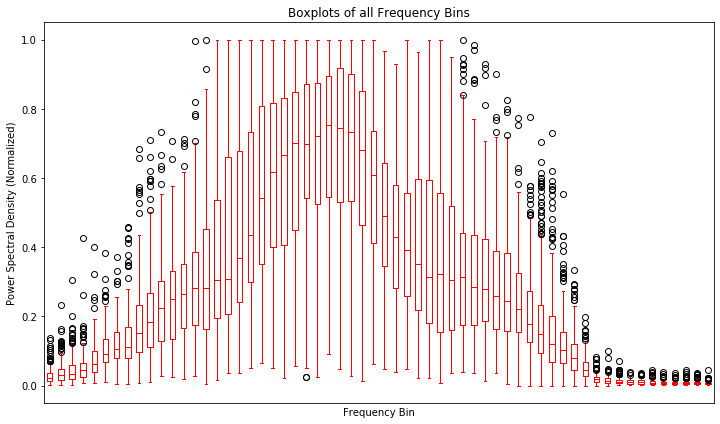

In [11]:
feature_sf.plot.box(figsize=(12,7), xticks=[], color='red')
plt.title('Boxplots of all Frequency Bins')
plt.xlabel('Frequency Bin')
plt.ylabel('Power Spectral Density (Normalized)')
plt.show()

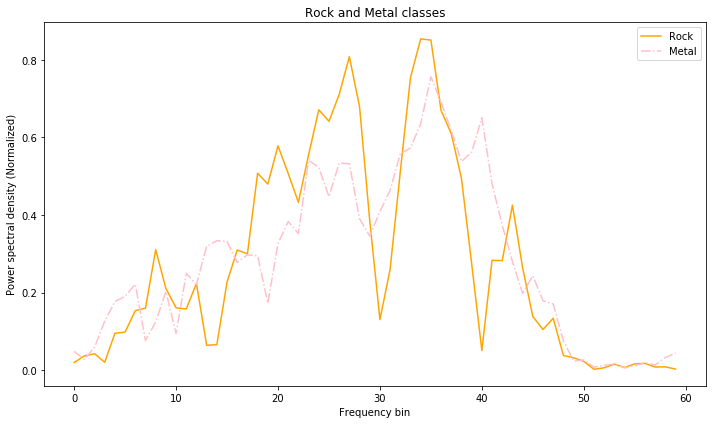

In [12]:
plt.figure(figsize=(10,6))
plt.plot( sf[sf.iloc[:,-1] == 'R'].values[0][:-1], label='Rock', color='orange')
plt.plot( sf[sf.iloc[:,-1] == 'M'].values[0][:-1], label='Metal', color='pink', linestyle='-.')
plt.legend()
plt.title('Rock and Metal classes')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density (Normalized)')
plt.tight_layout()
plt.show()

In [13]:
# Analysis the Correlation in the feature space.
corr=feature_sf.corr()
corr.style.background_gradient(cmap='BrBG').set_precision(2)

In [14]:
LabelEncoder().fit_transform(sf.iloc[:,-1])
print(sf.iloc[:,-1].shape)
# Reshape the target variable 
target_sf= sf.iloc[:,-1].values.reshape(-1,1)
print(target_sf.shape)
sc = StandardScaler()
feature_data_std = sc.fit_transform(feature_sf)
print(feature_sf.shape)

(208,)
(208, 1)
(208, 60)


# Baseline Model 

In [15]:
x_train, x_test, y_train, y_test = train_test_split(feature_sf, target_sf, test_size=0.20, shuffle=True, random_state=42)
[subset.shape for subset in [x_train,y_test,x_train,y_test]]

[(166, 60), (42, 1), (166, 60), (42, 1)]

In [16]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
print(rf.get_params)

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>


In [17]:
rf = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("*Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

*Test Accuracy: 83.33%


Analysis of RandomizedSearchCV Hyper Parameter Tunning/ fine-tuning

In [25]:
# specify parameters and distributions
param_dist = dict(n_estimators=list(range(1,100)),
                  max_depth=list(range(1,100)),
                  min_samples_leaf=list(range(1,10)), random_state=list(range(42,242)), bootstrap=[True, False],
                  criterion = ["gini", "entropy"])

In [33]:
rand = RandomizedSearchCV(rf, param_dist, cv=10,n_iter=30)
rand.fit(x_train, y_train)
print(rand.get_params)

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10, n_jobs=-1,
             

In [31]:
rf_best_parameter=rand.best_params_
print(rf_best_parameter)

{'random_state': 99, 'n_estimators': 71, 'min_samples_leaf': 2, 'max_depth': 91, 'criterion': 'entropy', 'bootstrap': False}


In [ ]:
# Lastly Save the model for futher use
#joblib.dump(dt_classifier, 'wine_quality.pkl')

In [37]:
rf_search = RandomForestClassifier(random_state=99, n_jobs=-1,
                            n_estimators=71, min_samples_leaf = 2, 
                            max_depth=91, criterion='entropy', bootstrap=False )

In [38]:
rf = rf_search.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("*Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

*Test Accuracy: 83.33%


In [69]:
# Supoort Vector Machine has been opted after analysisng no change of result before and after random forest parametes tunning. 

In [66]:
def train_test_SVC_classification(x_train, x_test, y_train, y_test):
    SVC_classification = SVC()
    # libsvm is quite slow 
    grid_parameters_SVC_classification = {'C' : [1, 5, 7, 10, 30, 50,75,90,100,110],
                                     'kernel' : ['rbf', 'linear'],
                                     'shrinking' : [False, True],
                                     'tol' : [0.001, 0.0001, 0.00001]}
    start_time = time.time()
    grid_obj = GridSearchCV(SVC_classification, param_grid=grid_parameters_SVC_classification, cv=4, n_jobs=-1)
    grid_fit = grid_obj.fit(x_train, y_train)
    training_time = time.time() - start_time
    best_SVC_classification = grid_fit.best_estimator_
    prediction = best_SVC_classification.predict(x_test)
    accuracy = accuracy_score(y_true=y_test, y_pred=prediction)
    classification_rep = classification_report(y_true=y_test, y_pred=prediction)
    
    # Find Best Paramters of Support Vector Machine 
    print("Best Parameters for SVM: ", grid_fit.best_estimator_)
    print("Best Score for SVM: ", grid_fit.best_score_)
    print("******************************************")
    
    
    #print confusion matrix and accuracy score before best parameters
    _conf_matrix = confusion_matrix(y_test, prediction)
    print("Confusion matrix of: \n", _conf_matrix)
    print("==========================================")
    print("Classification Report: \n {}".format (classification_report(y_test, prediction)))
    return best_SVC_classification

In [67]:
train_test_SVC_classification(x_train, x_test, y_train, y_test)

Best Parameters for SVM:  SVC(C=90, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=False, tol=0.001, verbose=False)
Best Score for SVM:  0.8072289156626506
******************************************
Confusion matrix of: 
 [[22  4]
 [ 1 15]]
Classification Report: 
               precision    recall  f1-score   support

           M       0.96      0.85      0.90        26
           R       0.79      0.94      0.86        16

    accuracy                           0.88        42
   macro avg       0.87      0.89      0.88        42
weighted avg       0.89      0.88      0.88        42



SVC(C=90, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=False, tol=0.001, verbose=False)

In [68]:
# Lastly Save the model for futher use
joblib.dump(train_test_SVC_classification, 'wine_quality.pkl')

['wine_quality.pkl']